In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

# Constants
batch_size = 512
num_classes = 10
epochs = 10
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Train the CNN model and get its validation accuracy
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# Define a function to create the CNN model with sigmoid units
def create_sigmoid_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('sigmoid'))  # Use sigmoid activation
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('sigmoid'))  # Use sigmoid activation
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('sigmoid'))  # Use sigmoid activation
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('sigmoid'))  # Use sigmoid activation
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('sigmoid'))  # Use sigmoid activation
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

# Create the CNN model with sigmoid units
model_sigmoid = create_sigmoid_cnn()

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train and evaluate the models
validation_accuracies = []
# Preprocess the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
    validation_accuracies.append(history.history['val_accuracy'])
else:
    print('Using real-time data augmentation.')

    # Data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0,
        zoom_range=0,
        channel_shift_range=0,
        fill_mode='nearest',
        cval=0,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0
    )

    # Compute quantities required for feature-wise normalization
    datagen.fit(x_train)

    # Fit the model with data augmentation
    history = model.fit_generator(
        datagen.flow(x_train, y_train, batch_size=batch_size),
        epochs=epochs,
        validation_data=(x_test, y_test),
        workers=4
    )
    validation_accuracies.append(history.history['val_accuracy'])

Using real-time data augmentation.


<ipython-input-16-562516f083be>:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
98/98 [==============================] - 29s 282ms/step - loss: 2.1205 - accuracy: 0.2141 - val_loss: 1.9521 - val_accuracy: 0.3184
Epoch 2/10
98/98 [==============================] - 29s 279ms/step - loss: 1.9184 - accuracy: 0.3051 - val_loss: 1.7949 - val_accuracy: 0.3810
Epoch 3/10
98/98 [==============================] - 29s 285ms/step - loss: 1.8215 - accuracy: 0.3418 - val_loss: 1.6966 - val_accuracy: 0.4044
Epoch 4/10
98/98 [==============================] - 27s 270ms/step - loss: 1.7616 - accuracy: 0.3634 - val_loss: 1.6342 - val_accuracy: 0.4242
Epoch 5/10
98/98 [==============================] - 28s 277ms/step - loss: 1.7164 - accuracy: 0.3804 - val_loss: 1.6132 - val_accuracy: 0.4229
Epoch 6/10
98/98 [==============================] - 28s 275ms/step - loss: 1.6780 - accuracy: 0.3939 - val_loss: 1.5507 - val_accuracy: 0.4469
Epoch 7/10
98/98 [==============================] - 28s 280ms/step - loss: 1.6458 - accuracy: 0.4033 - val_loss: 1.5344 - val_accuracy: 0.4445

In [ ]:
# Compile the model
model_sigmoid.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Preprocess the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

validation_accuracies_sigmoid = []

if not data_augmentation:
    print('Not using data augmentation.')
    history_sigmoid = model_sigmoid.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
    validation_accuracies_sigmoid.append(history_sigmoid.history['val_accuracy'])
else:
    print('Using real-time data augmentation.')

    # Data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0,
        zoom_range=0,
        channel_shift_range=0,
        fill_mode='nearest',
        cval=0,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0
    )

    # Compute quantities required for feature-wise normalization
    datagen.fit(x_train)

    # Fit the models with data augmentation
    history_sigmoid = model_sigmoid.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)

    validation_accuracies_sigmoid.append(history_sigmoid.history['val_accuracy'])


Using real-time data augmentation.


<ipython-input-17-c29c62643d58>:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_sigmoid = model_sigmoid.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)


Epoch 1/10
98/98 [==============================] - 29s 281ms/step - loss: 2.3806 - accuracy: 0.0994 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 29s 276ms/step - loss: 2.3079 - accuracy: 0.0984 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 28s 275ms/step - loss: 2.3043 - accuracy: 0.1006 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 28s 276ms/step - loss: 2.3038 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 28s 276ms/step - loss: 2.3036 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
98/98 [==============================] - 28s 275ms/step - loss: 2.3033 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
98/98 [==============================] - 28s 281ms/step - loss: 2.3034 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1000

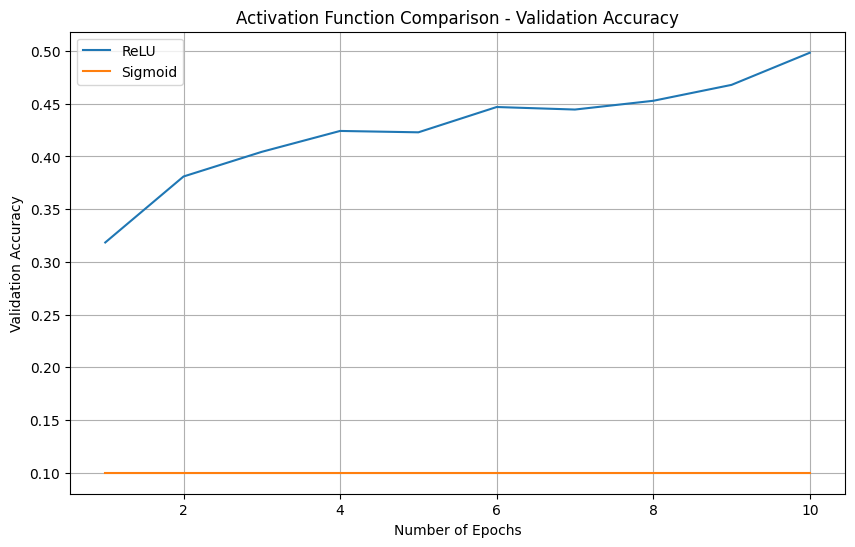

In [ ]:
# Plot the validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), validation_accuracies[0], label='ReLU')
plt.plot(range(1, epochs + 1), validation_accuracies_sigmoid[0], label='Sigmoid')

plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Activation Function Comparison - Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()